In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Add the src directory to the path
sys.path.append(str(Path.cwd().parent / 'src'))

# Import our model training functions
from models.train import *

# Set style
plt.style.use('default')
sns.set_palette("Set2")
%matplotlib inline

In [2]:
# Load the engineered data
project_root = Path.cwd().parent
data_path = project_root / 'data' / 'processed' / 'hr_dataset_engineered.csv'

print(f"Loading data...")
df = pd.read_csv(data_path)
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Loading data...
Data loaded successfully!
Dataset shape: (1952, 17)


In [3]:
# Check target variable distribution
print("Target variable distribution:")
print(df['AttritionFlag'].value_counts())
print(f"\nAttrition rate: {df['AttritionFlag'].mean():.2%}")

Target variable distribution:
AttritionFlag
0    1565
1     387
Name: count, dtype: int64

Attrition rate: 19.83%


In [4]:
# Prepare data for modeling
print("Preparing data for modeling...")
X, y = prepare_data(df)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Preparing data for modeling...
Features shape: (1952, 13)
Target shape: (1952,)


In [5]:
# Train multiple models
print("Training multiple models...")
print("=" * 50)
results, X_test, y_test = train_models(X, y)

Training multiple models...
RandomForest: Accuracy = 0.795, F1 = 0.000, ROC-AUC = 0.507
GradientBoosting: Accuracy = 0.783, F1 = 0.000, ROC-AUC = 0.479
LogisticRegression: Accuracy = 0.455, F1 = 0.253, ROC-AUC = 0.455


In [6]:
# Compare model performance
print("\nModel Comparison:")
print("=" * 50)
model_comparison = []
for name, result in results.items():
    model_comparison.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'F1_Score': result['f1_score'],
        'ROC_AUC': result['roc_auc']
    })

model_df = pd.DataFrame(model_comparison)
display(model_df.sort_values('F1_Score', ascending=False))


Model Comparison:


,Model,Accuracy,F1_Score,ROC_AUC
2,LogisticRegression,0.455243,0.252632,0.454821
0,RandomForest,0.795396,0.000000,0.506656
1,GradientBoosting,0.782609,0.000000,0.478578


In [7]:
# Optimize the best model (Random Forest)
print("Optimizing Random Forest...")
print("=" * 50)
best_model = optimize_random_forest(X, y)

Optimizing Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 score: 0.0721715524618197


Evaluating optimized model...
Best Model Evaluation:
Accuracy: 0.977
F1 Score: 0.940
ROC-AUC: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       313
           1       0.99      0.90      0.94        78

    accuracy                           0.98       391
   macro avg       0.98      0.95      0.96       391
weighted avg       0.98      0.98      0.98       391



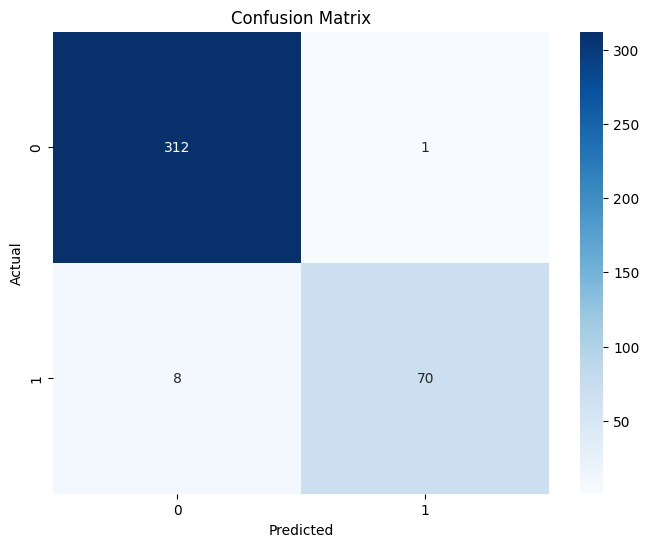

In [8]:
# Evaluate optimized model
print("Evaluating optimized model...")
print("=" * 50)
final_metrics = evaluate_best_model(best_model, X_test, y_test)

Plotting feature importance...


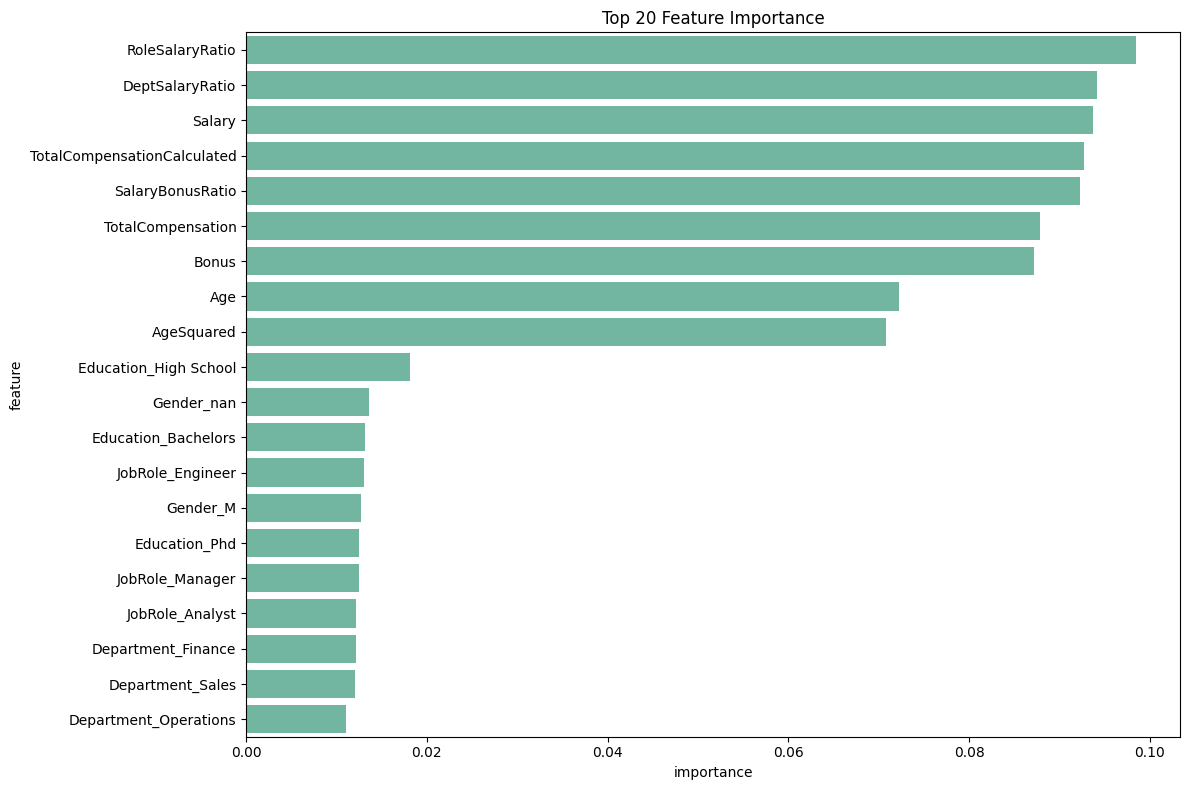

In [9]:
# Plot feature importance
print("Plotting feature importance...")
print("=" * 50)
feature_importance = plot_feature_importance(
    best_model, 
    X, 
    save_path=project_root / 'notebooks' / 'outputs' / 'feature_importance.png'
)

In [10]:
# Display top features
print("Top 10 most important features:")
display(feature_importance.head(10))

Top 10 most important features:


,feature,importance
7,RoleSalaryRatio,0.098411
6,DeptSalaryRatio,0.094093
1,Salary,0.093731
8,TotalCompensationCalculated,0.092711
4,SalaryBonusRatio,0.092256
3,TotalCompensation,0.087807
2,Bonus,0.087202
0,Age,0.072221
5,AgeSquared,0.070824
28,Education_High School,0.018163


In [11]:
# Save the best model
print("Saving the best model...")
print("=" * 50)
model_path = project_root / 'models' / 'attrition_predictor.pkl'
save_model(best_model, model_path)

Saving the best model...
Model saved!!


In [12]:
# Save predictions for analysis
print("Saving predictions for analysis...")
print("=" * 50)
# Get predictions for entire dataset
df['Prediction'] = best_model.predict(X)
df['Prediction_Probability'] = best_model.predict_proba(X)[:, 1]

# Save dataset with predictions
output_path = project_root / 'data' / 'processed' / 'hr_dataset_with_predictions.csv'
df.to_csv(output_path, index=False)
print(f"Dataset with predictions saved!!")

Saving predictions for analysis...
Dataset with predictions saved!!


In [13]:
# Summary report
output_path = project_root / 'notebooks' / 'outputs' / 'model_training_summary.txt'

with open(output_path, 'w') as f:
    f.write("HR ANALYTICS - MODEL TRAINING SUMMARY\n")
    f.write("="*50 + "\n\n")
    
    f.write("MODEL PERFORMANCE:\n")
    f.write("-"*30 + "\n")
    for _, row in model_df.iterrows():
        f.write(f"{row['Model']}: Accuracy={row['Accuracy']:.3f}, F1={row['F1_Score']:.3f}, ROC-AUC={row['ROC_AUC']:.3f}\n")
    
    f.write(f"\nBEST MODEL: RandomForest (Optimized)\n")
    f.write(f"Final F1 Score: {final_metrics['f1_score']:.3f}\n")
    f.write(f"Final ROC-AUC: {final_metrics['roc_auc']:.3f}\n")
    
    f.write("\nTOP 5 FEATURES:\n")
    f.write("-"*30 + "\n")
    for _, row in feature_importance.head().iterrows():
        f.write(f"{row['feature']}: {row['importance']:.3f}\n")

print(f"Summary report saved!!")
print("Model training completed successfully!")

Summary report saved!!
Model training completed successfully!
